In [1]:
import pickle
import numpy as np
import math
from nltk import sent_tokenize
from nltk.tokenize.punkt import PunktSentenceTokenizer, PunktParameters
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
corpusFolder = "./corpusMMI/folds10"
textFileTrain = {}         
textFileTest = {}

lessEqValuesNumP = [20, 30]
lessEqNumP = {}
for v in lessEqValuesNumP:
    lessEqNumP[v] = 0

lessEqValues = [15, 20, 30, 40, 100, 200]
lessEq = {}
for v in lessEqValues:
    lessEq[v] = 0

maxNumP = 0
avgNumP = 0
sdNumP = 0

maxLen = 0
avgLen = 0
sdLen = 0

fields = 0
lines = 0

tasks=['sede1', 'sede12', 'morfo1', 'morfo2']
for fold in range(10):
    #print("Fold {}".format(fold))
    for task in tasks:
        #print("    task {}".format(task))
        corpusFoldFolder = corpusFolder+"/"+task+"/"+str(fold)
        corpusFileTrain = corpusFoldFolder+"/corpusTrain.p"
        corpusFileTest = corpusFoldFolder+"/corpusTest.p"
        
        corpusTrain = pickle.load(open(corpusFileTrain, 'rb'))
        corpusTest = pickle.load(open(corpusFileTest, 'rb'))
        
        text = corpusTrain['X'] + corpusTest['X']
        
        for line in text:
            for field in line:
                fields += 1
                numP = len(field)
                if numP > maxNumP:
                    maxNumP = numP
                avgNumP += numP
                sdNumP += numP * numP
                
                for v in lessEqValuesNumP:
                    if numP <= v:
                        lessEqNumP[v] += 1
                
                for phrase in field:  
                    lines += 1
                    words = len(phrase.split())
                    if words > maxLen:
                        maxLen = words
                    avgLen += words
                    sdLen += words * words

                    for v in lessEqValues:
                        if words <= v:
                            lessEq[v] += 1
                    
avgLen /= lines
sdLen = math.sqrt((sdLen/lines) - (avgLen*avgLen))

avgNumP /= fields
sdNumP = math.sqrt((sdNumP/fields) - (avgNumP*avgNumP))

print("")
print("max numP = {}".format(maxNumP))
print("avg numP = {} +/- {}".format(avgNumP, sdNumP))
for v in lessEqValuesNumP:
    print("less eq {} = {:.1f}%".format(v, (lessEqNumP[v]/fields)*100))
print("max len = {}".format(maxLen))
print("avg len = {} +/- {}".format(avgLen, sdLen))
for v in lessEqValues:
    print("less eq {} = {:.1f}%".format(v, (lessEq[v]/lines)*100))


max numP = 59
avg numP = 2.273874061162373 +/- 2.7777500611382164
less eq 20 = 99.9%
less eq 30 = 100.0%
max len = 472
avg len = 14.440522782353614 +/- 15.112365824607766
less eq 15 = 70.6%
less eq 20 = 81.7%
less eq 30 = 91.0%
less eq 40 = 95.1%
less eq 100 = 99.5%
less eq 200 = 100.0%


In [3]:
corpusFile = "corpusMMI/corpusClean.p"

lessEqValuesNumP = [20, 30]
lessEqNumP = {}
for v in lessEqValuesNumP:
    lessEqNumP[v] = 0

lessEqValues = [15, 20, 30, 40, 100, 200]
lessEq = {}
for v in lessEqValues:
    lessEq[v] = 0

maxNumP = 0
avgNumP = 0
sdNumP = 0

maxLen = 0
avgLen = 0
sdLen = 0

fields = 0
lines = 0

corpus = pickle.load(open(corpusFile, 'rb'))
text = corpus['text']

for line in text:
            for field in line:
                fields += 1
                numP = len(field)
                if numP > maxNumP:
                    maxNumP = numP
                avgNumP += numP
                sdNumP += numP * numP
                
                for v in lessEqValuesNumP:
                    if numP <= v:
                        lessEqNumP[v] += 1
                
                for phrase in field:  
                    lines += 1
                    words = len(phrase.split())
                    if words > maxLen:
                        maxLen = words
                    avgLen += words
                    sdLen += words * words

                    for v in lessEqValues:
                        if words <= v:
                            lessEq[v] += 1
            
avgLen /= lines
sdLen = math.sqrt((sdLen/lines) - (avgLen*avgLen))

avgNumP /= fields
sdNumP = math.sqrt((sdNumP/fields) - (avgNumP*avgNumP))

print("")
print("max numP = {}".format(maxNumP))
print("avg numP = {} +/- {}".format(avgNumP, sdNumP))
for v in lessEqValuesNumP:
    print("less eq {} = {:.1f}%".format(v, (lessEqNumP[v]/fields)*100))
print("max len = {}".format(maxLen))
print("avg len = {} +/- {}".format(avgLen, sdLen))
for v in lessEqValues:
    print("less eq {} = {:.1f}%".format(v, (lessEq[v]/lines)*100))


max numP = 59
avg numP = 2.273545524773386 +/- 2.777585282678766
less eq 20 = 99.9%
less eq 30 = 100.0%
max len = 472
avg len = 14.439473807260088 +/- 15.109519037944265
less eq 15 = 70.6%
less eq 20 = 81.7%
less eq 30 = 91.0%
less eq 40 = 95.1%
less eq 100 = 99.5%
less eq 200 = 100.0%


In [4]:
textFile = "corpusMMI/corpusClean.p"

numPs = []
lengths = []

corpus = pickle.load(open(corpusFile, 'rb'))
text = corpus['text']

for line in text:
            for field in line:
                fields += 1
                numP = len(field)
                numPs.append(numP)
                
                for phrase in field:  
                    lines += 1
                    words = len(phrase.split())
                    lengths.append(words)

countNumP = Counter(numPs)
orderedNumP = list(countNumP.keys())
orderedNumP.sort()
valuesNumP = []
for i in orderedNumP:
    valuesNumP.append(countNumP.get(i))
    
count = Counter(lengths)
ordered = list(count.keys())
ordered.sort()
values = []
for i in ordered:
    values.append(count.get(i))

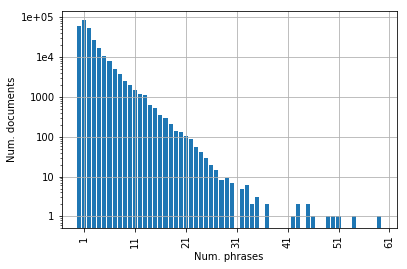

In [5]:
fig = plt.figure()
ax = fig.gca()
ax.set_yscale('log')
##ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.get_yaxis().set_major_formatter(plt.LogFormatter(10,  labelOnlyBase=False))
plt.xticks(np.arange(min(ordered),max(ordered),10), rotation='vertical')
#plt.title(titles[t])
#plt.scatter(ordered, values)
plt.bar(orderedNumP, valuesNumP)
plt.grid()
plt.rc('grid', linestyle="--", color='gray')
plt.xlabel("Num. phrases")
plt.ylabel("Num. documents")
plt.savefig("/tmp/figWords.pdf", bbox_inches='tight')
plt.show()

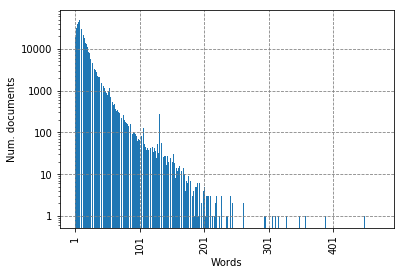

In [6]:
fig = plt.figure()
ax = fig.gca()
ax.set_yscale('log')
##ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.get_yaxis().set_major_formatter(plt.LogFormatter(10,  labelOnlyBase=False))
plt.xticks(np.arange(min(ordered),max(ordered),100), rotation='vertical')
#plt.title(titles[t])
#plt.scatter(ordered, values)
plt.bar(ordered, values)
plt.grid()
plt.rc('grid', linestyle="--", color='gray')
plt.xlabel("Words")
plt.ylabel("Num. documents")
plt.savefig("/tmp/figWords.pdf", bbox_inches='tight')
plt.show()